In [7]:
import os
import sys
import numpy as np
from glob import glob
from random import choices
import matplotlib.pyplot as plt

sys.path.append("../src")

from data import load_npy_file, convert_signal_to_complex

In [8]:
base_dir = "../data/RadioML/snr_0db/train/"
class_names = os.listdir(base_dir)
print(class_names)

sample_names = [choices(glob(f"{base_dir}{folder}/*"), k=2) for folder in class_names]

['128APSK', '128QAM', '16APSK', '16PSK', '16QAM', '256QAM', '32APSK', '32PSK', '32QAM', '4ASK', '64APSK', '64QAM', '8ASK', '8PSK', 'AM-DSB-SC', 'AM-DSB-WC', 'AM-SSB-SC', 'AM-SSB-WC', 'BPSK', 'FM', 'GMSK', 'OOK', 'OQPSK', 'QPSK']


In [9]:
signal = load_npy_file('../data/RadioML/snr_-10db/train/4ASK/sample_0.npy')
signal = convert_signal_to_complex(signal)
signal.shape

(1024,)

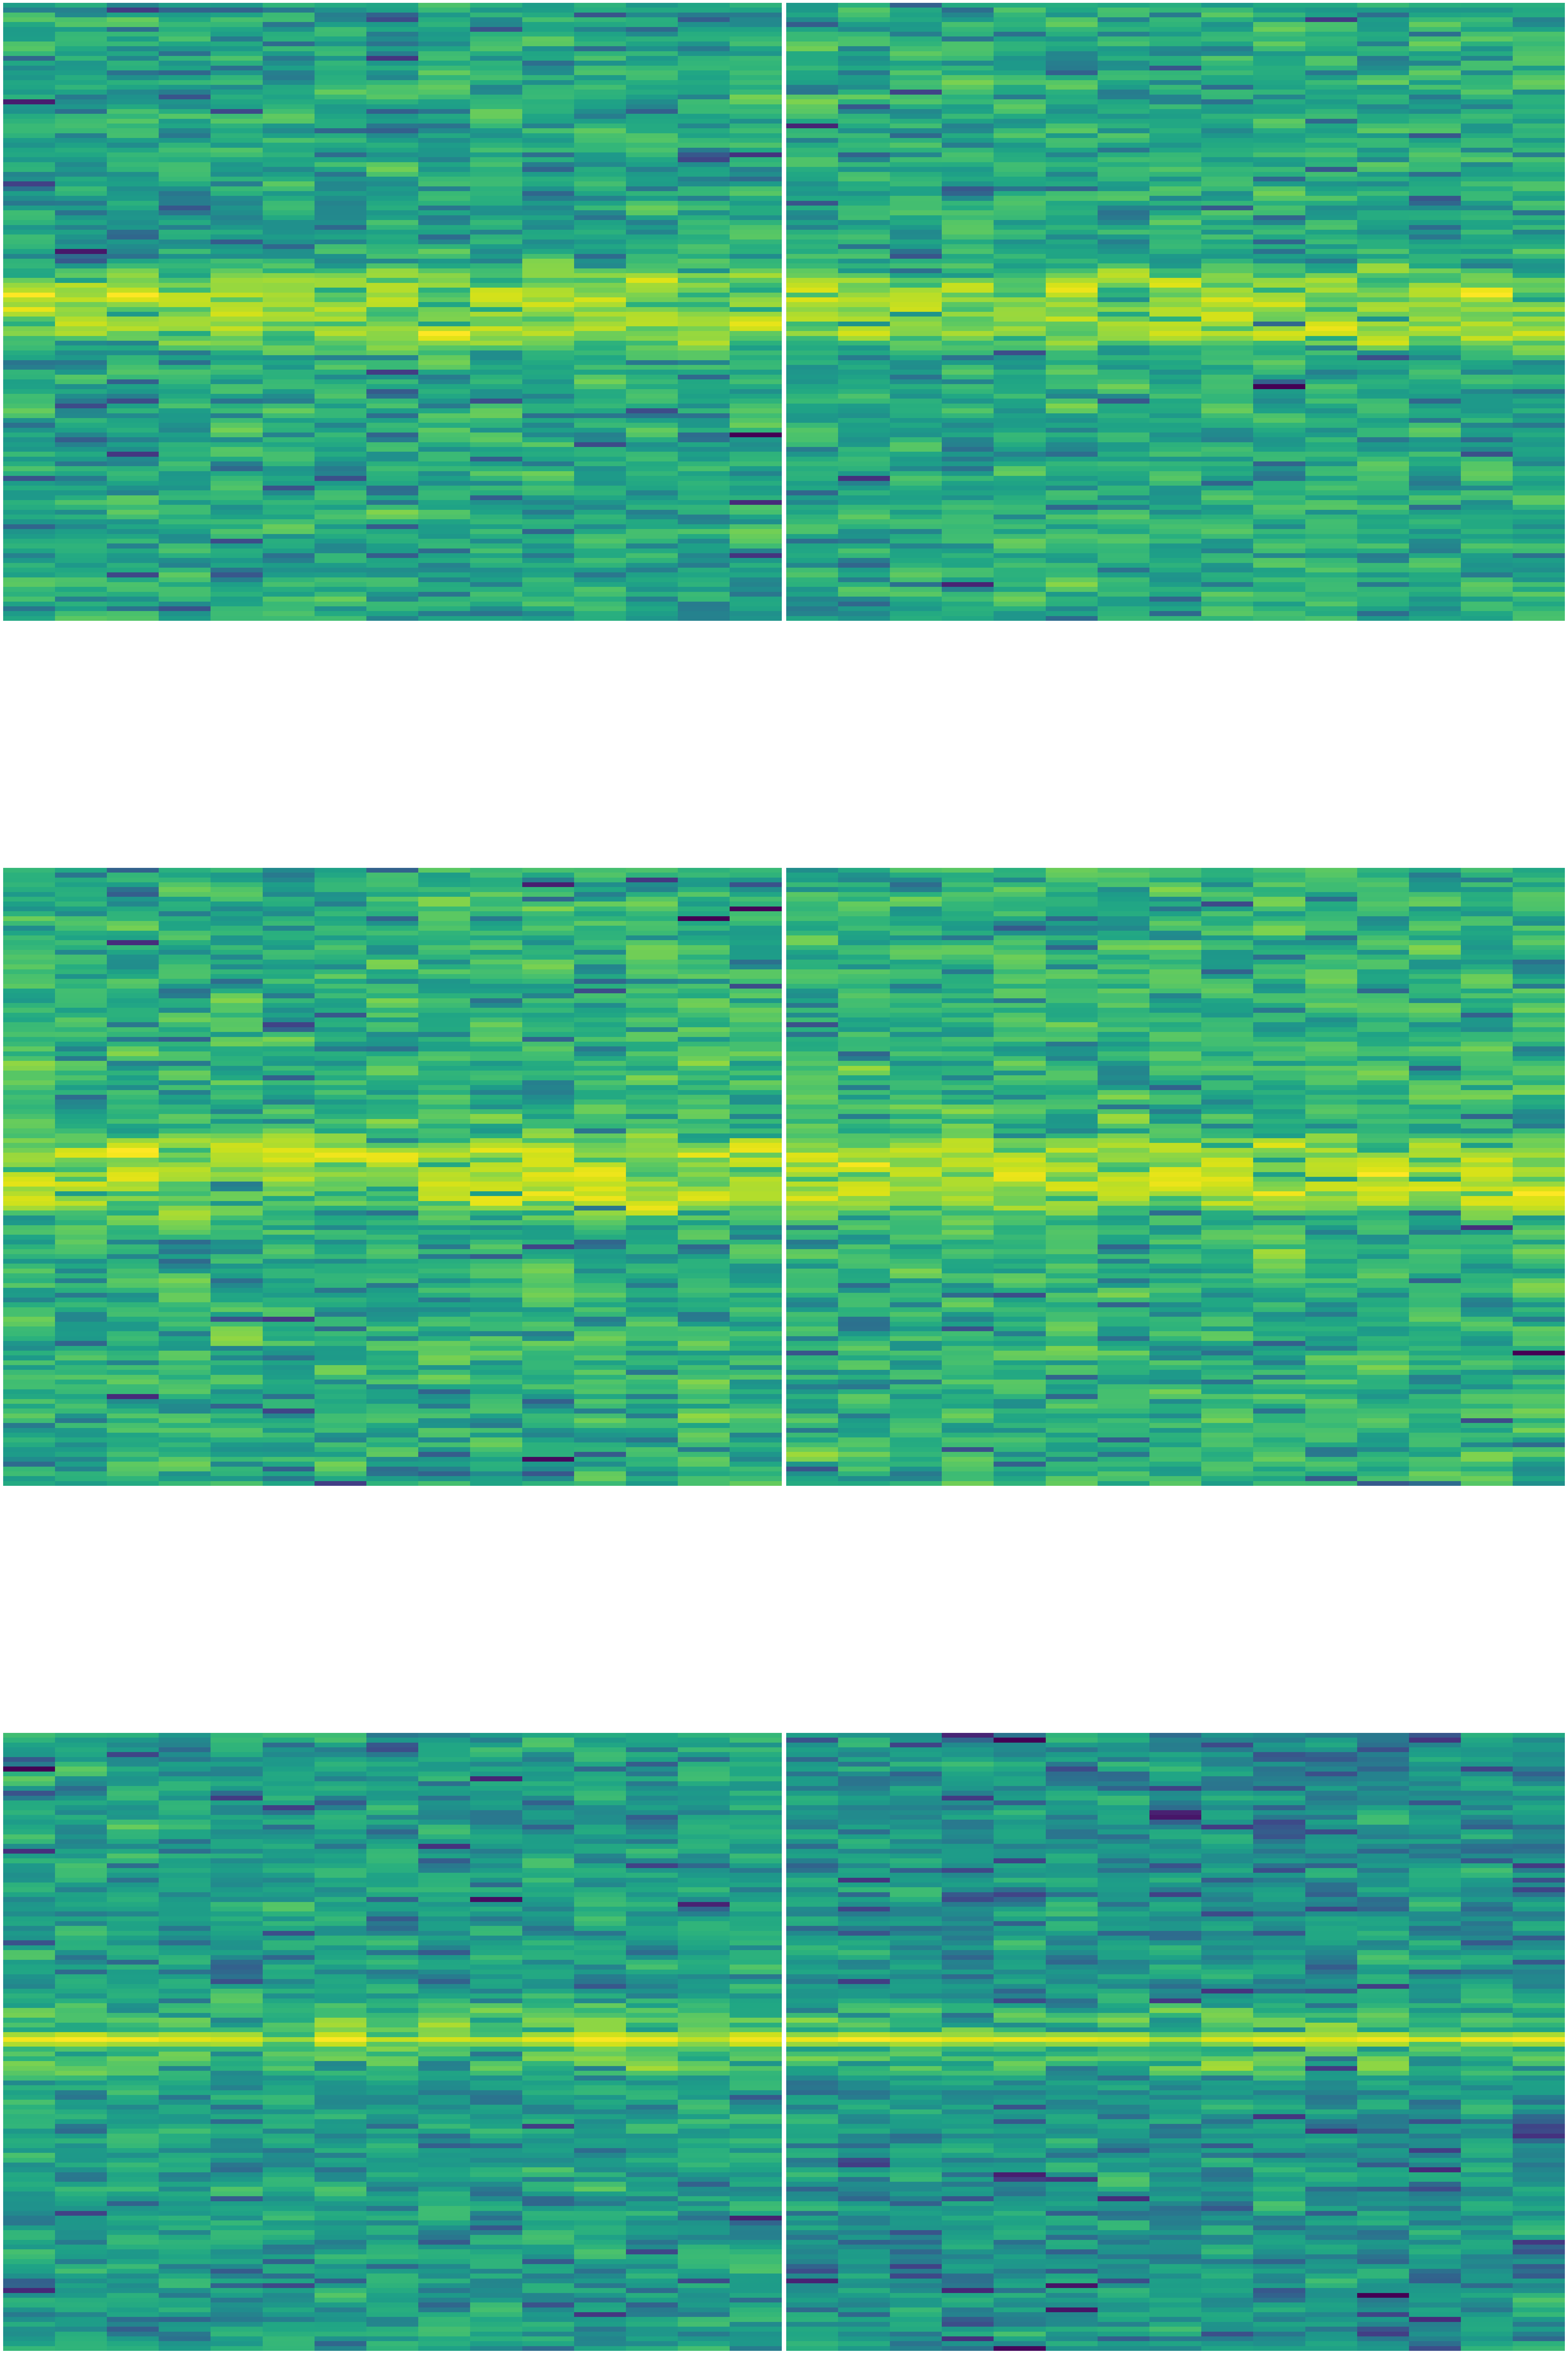

In [4]:
# Determine the number of rows and columns for the subplots
sample_names = sample_names[:3]  # Limit to 3 classes for demonstration
nrows = len(sample_names)
# Assuming all inner lists in sample_names have the same length (k=3 from cell 1)
ncols = len(sample_names[0]) if nrows > 0 and len(sample_names[0]) > 0 else 0

if nrows > 0 and ncols > 0:
    # Create a figure and an array of axes
    # Adjust figsize: (width, height). E.g. 4 inches per column, 1.5 inches per row.
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 25, nrows * 25))

    # Ensure axes is always a 2D array for consistent indexing, even if nrows=1 or ncols=1
    if nrows == 1 and ncols == 1:
        axes = np.array([[axes]])
    elif nrows == 1:
        axes = np.array([axes])
    elif ncols == 1:
        axes = axes.reshape(-1, 1)

    # Iterate through each class and its sample file paths
    for i, class_sample_paths in enumerate(sample_names):
        # Set a title for the row using the y-label of the first plot in the row
        # This makes it clear which class this row represents
        axes[i, 0].set_ylabel(class_names[i], rotation=0, size='medium', labelpad=40, ha='right', va='center')

        for j, file_path in enumerate(class_sample_paths):
            current_ax = axes[i, j]

            # Load and convert the signal
            signal_data = load_npy_file(file_path)
            complex_signal = convert_signal_to_complex(signal_data)

            # Generate the spectrogram
            # NFFT=256 is used as in the original cell. Default Fs=2.
            current_ax.specgram(x=complex_signal, NFFT=128, noverlap=64)

            # Turn off the axes (labels, ticks) for a pure image representation
            current_ax.axis('off')

    # Adjust layout to prevent overlap of titles or subplots
    plt.tight_layout()
    # Add a bit more vertical space between subplots if class names are long or overlap
    fig.subplots_adjust(hspace=0.4) 

    plt.show() # Explicitly show the plot
else:
    print("No samples to display.")


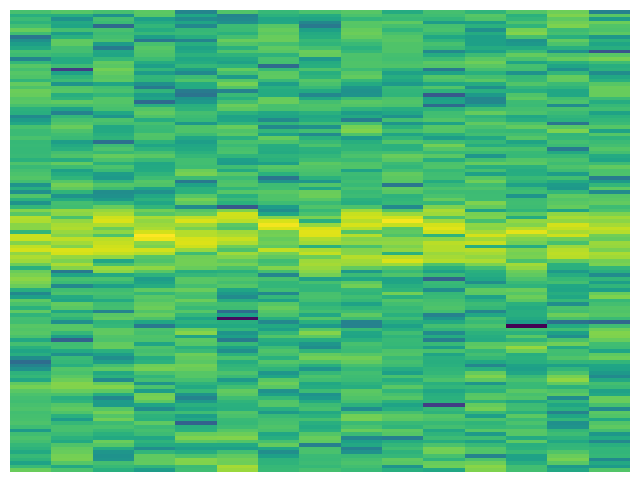

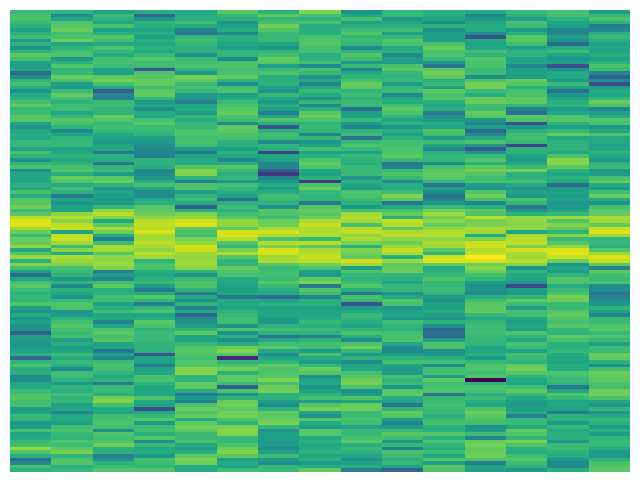

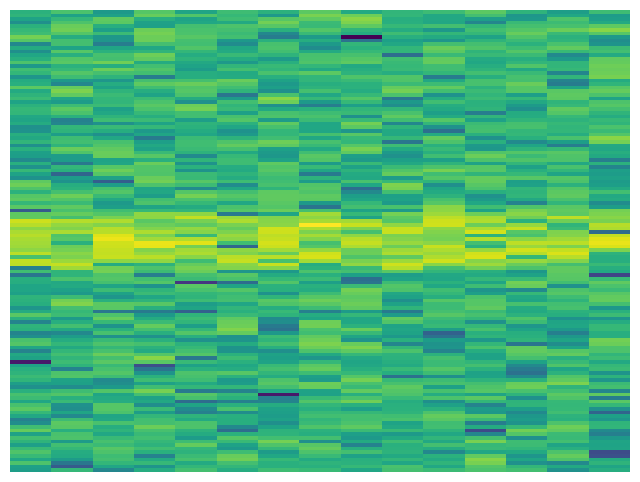

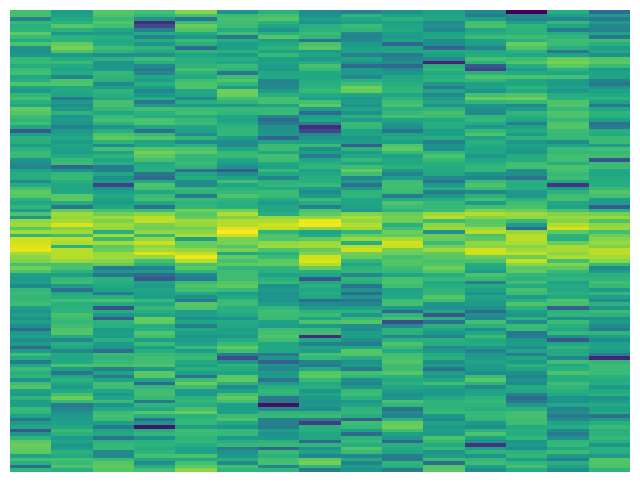

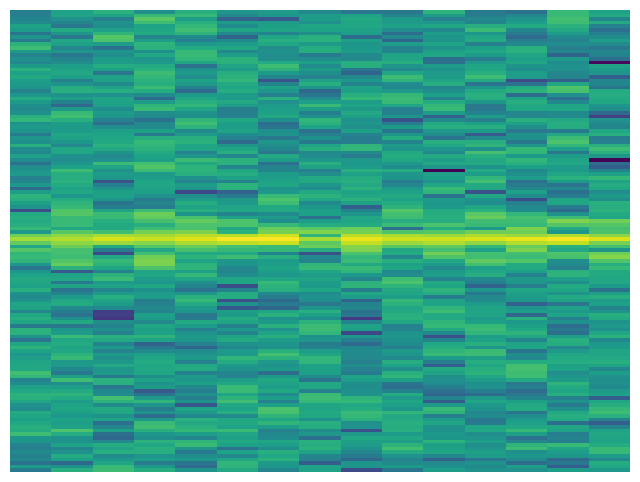

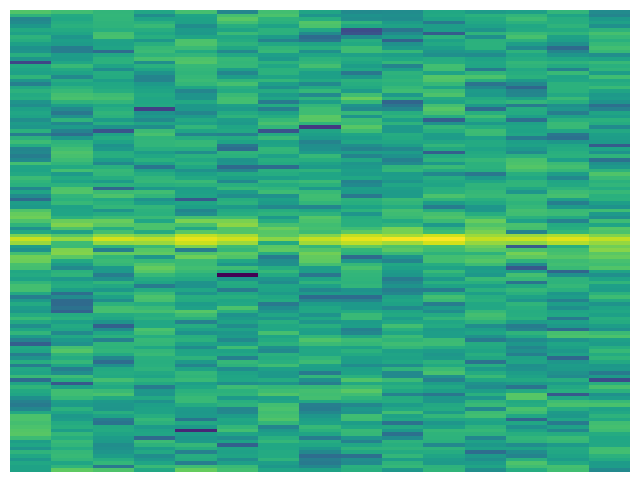

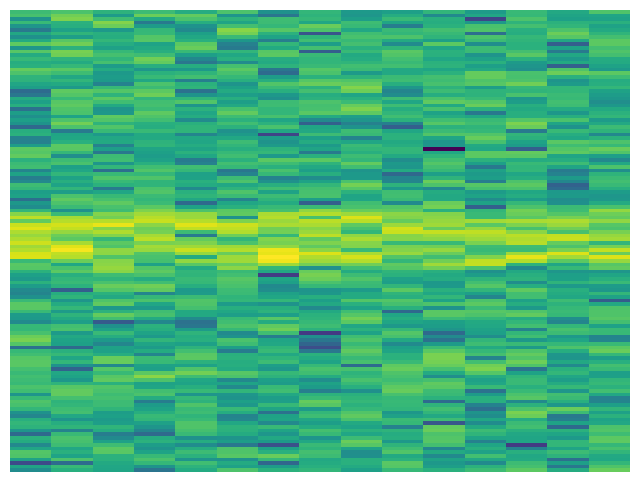

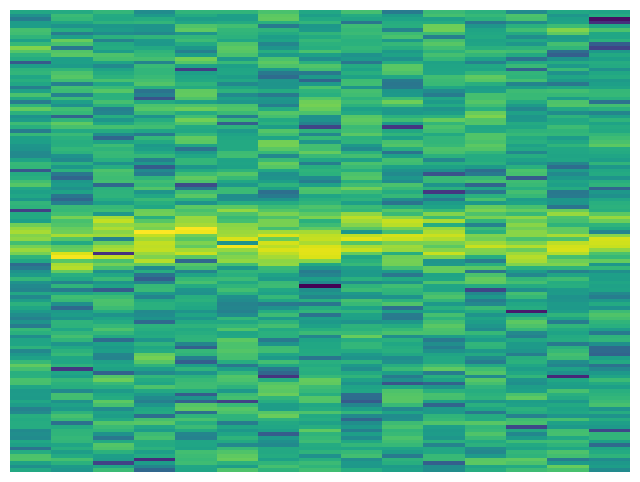

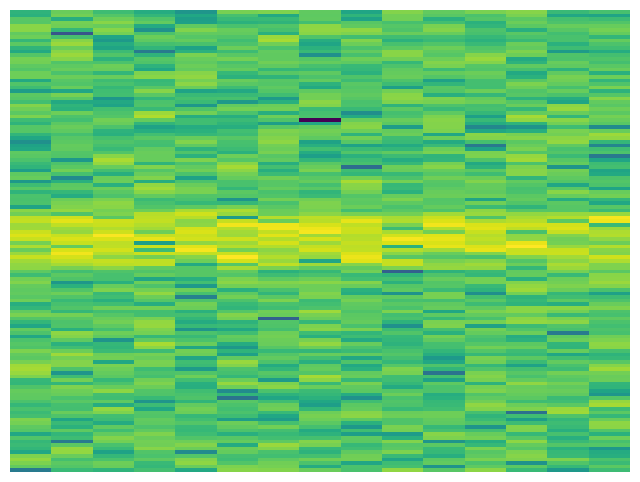

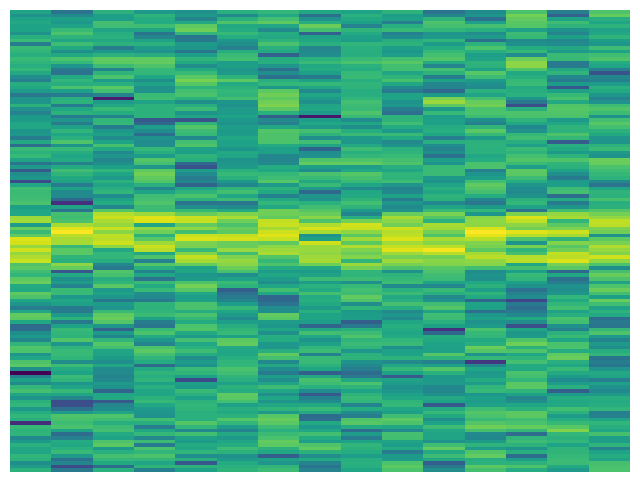

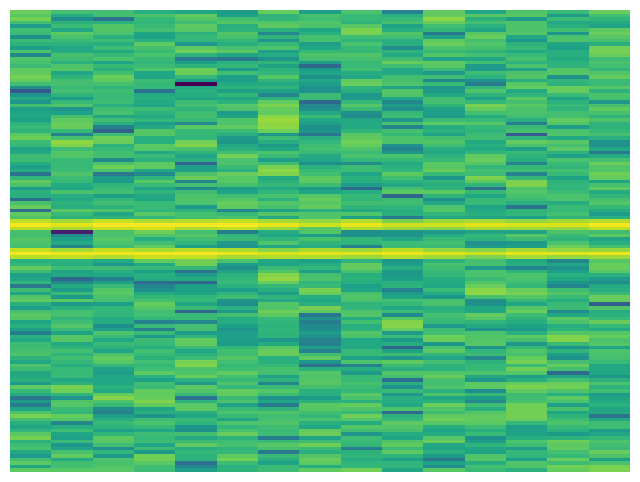

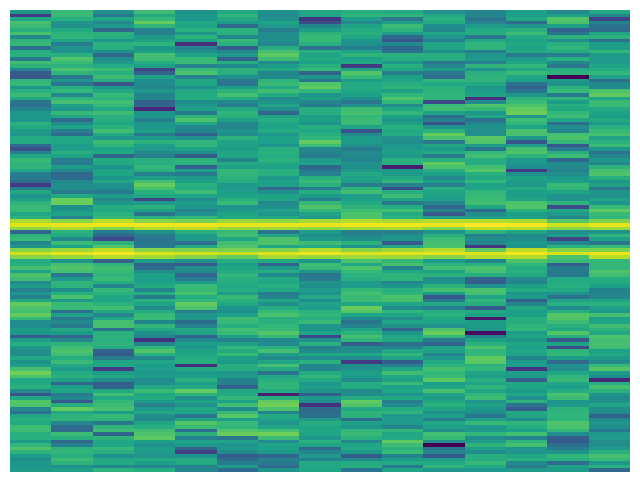

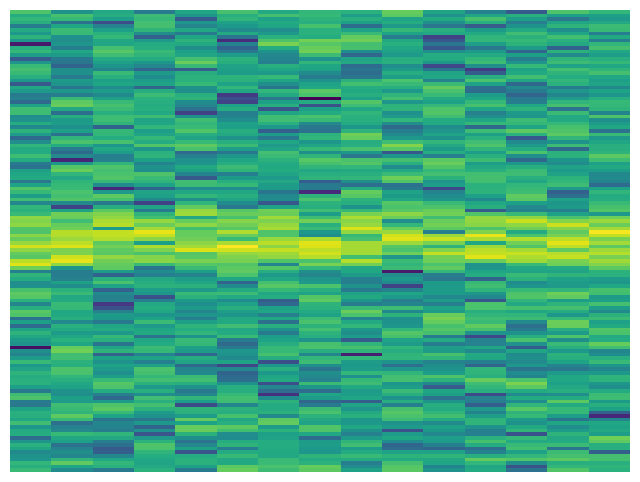

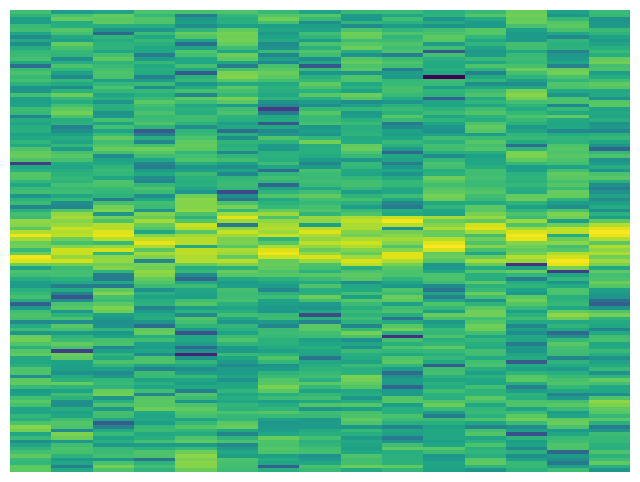

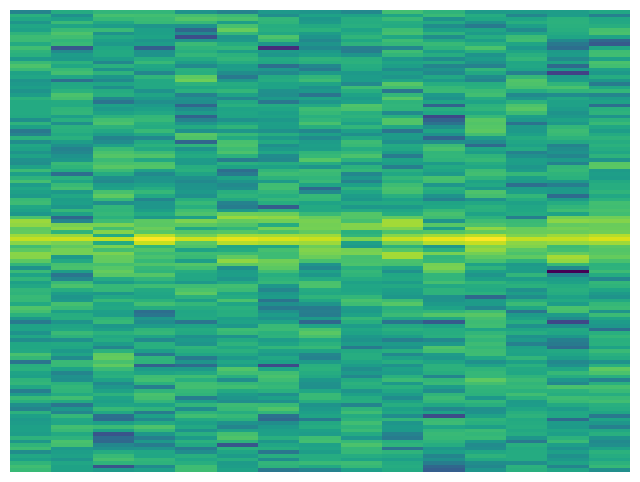

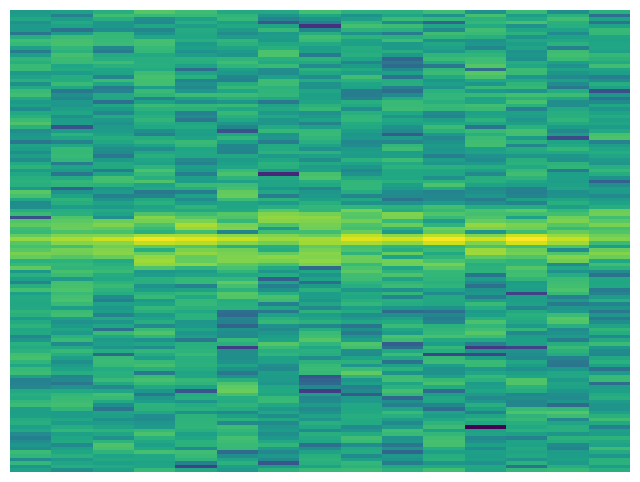

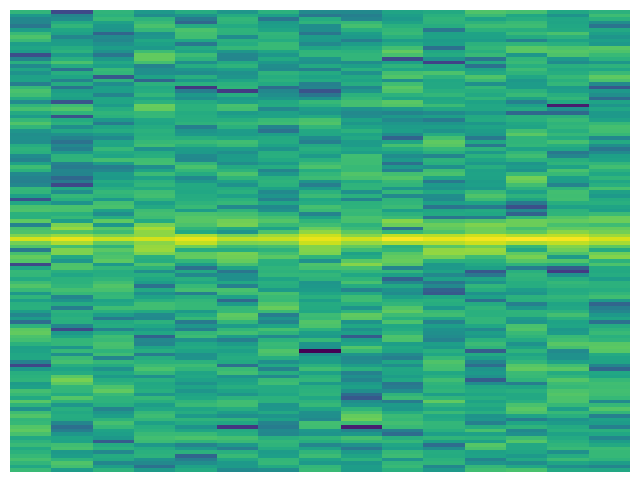

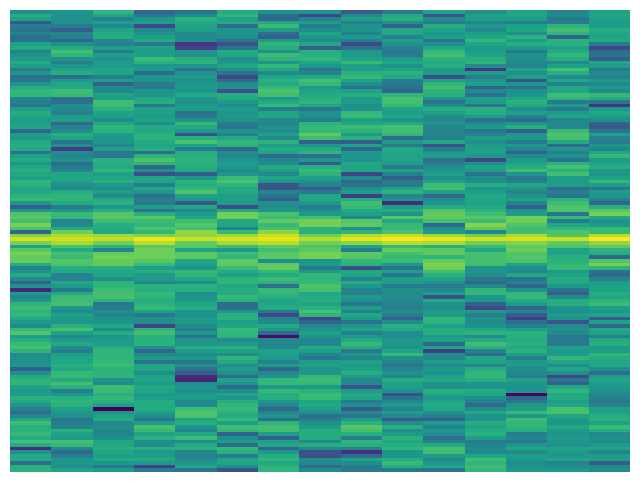

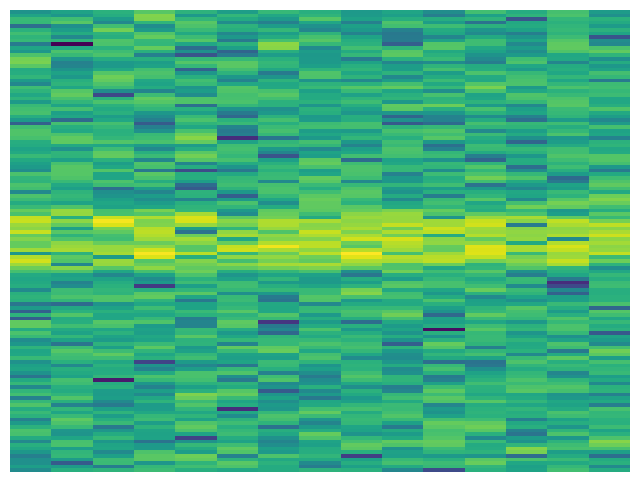

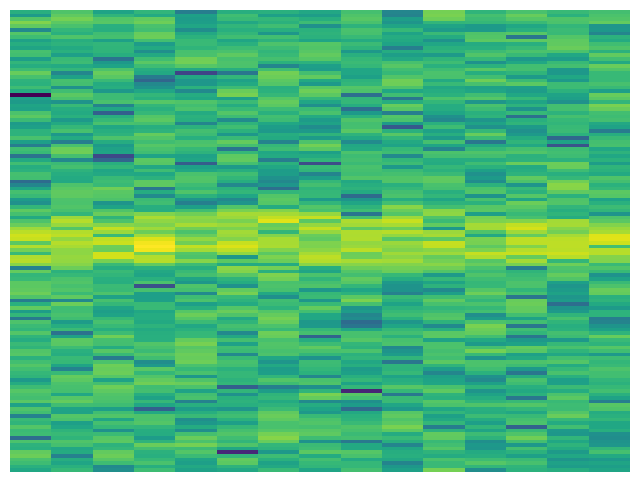

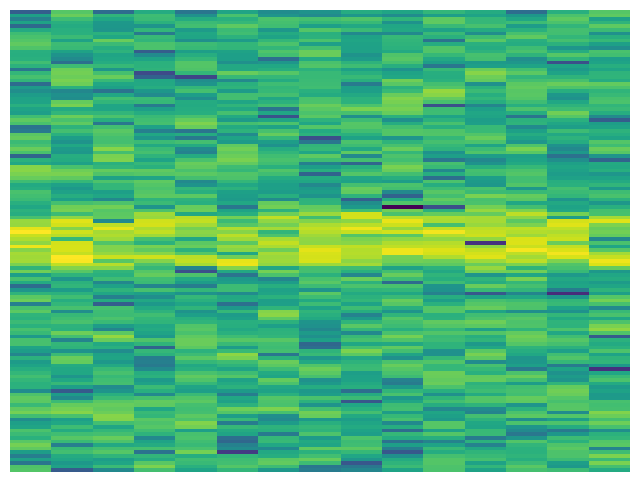

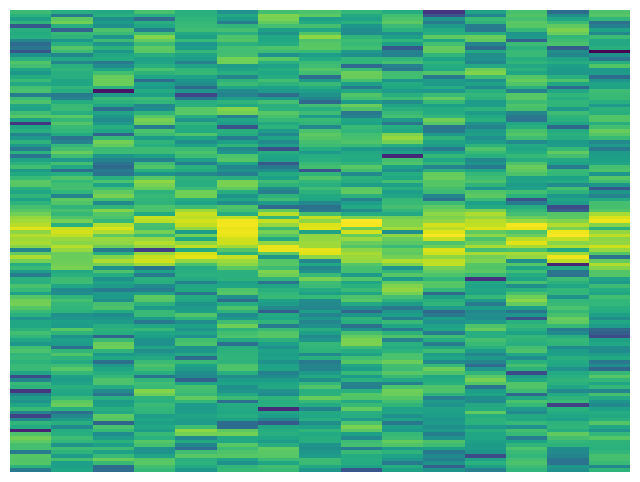

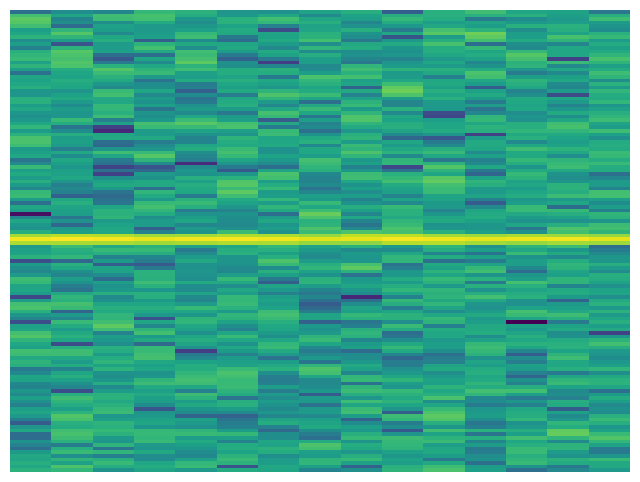

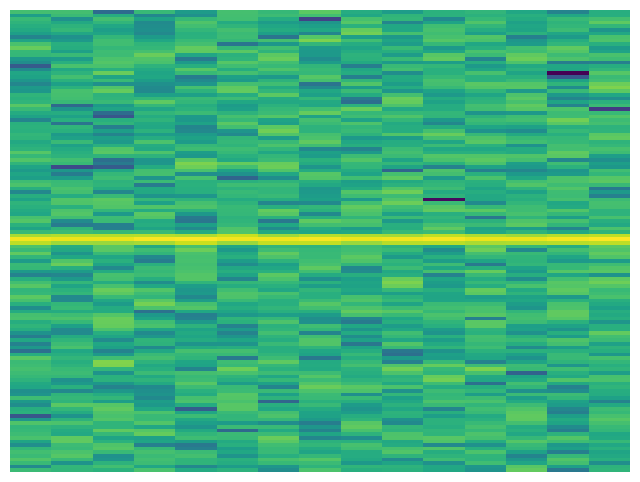

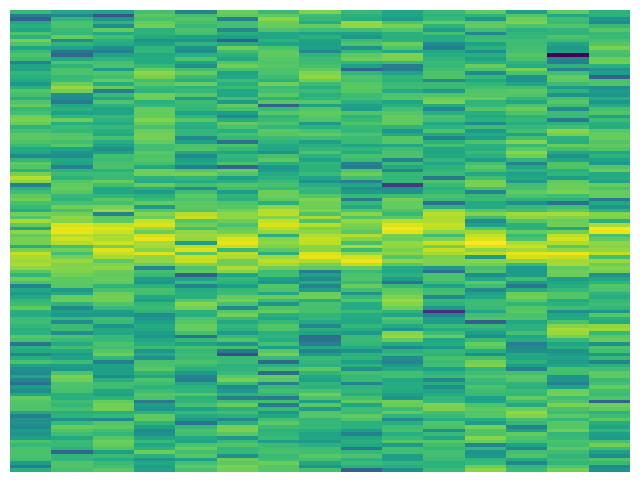

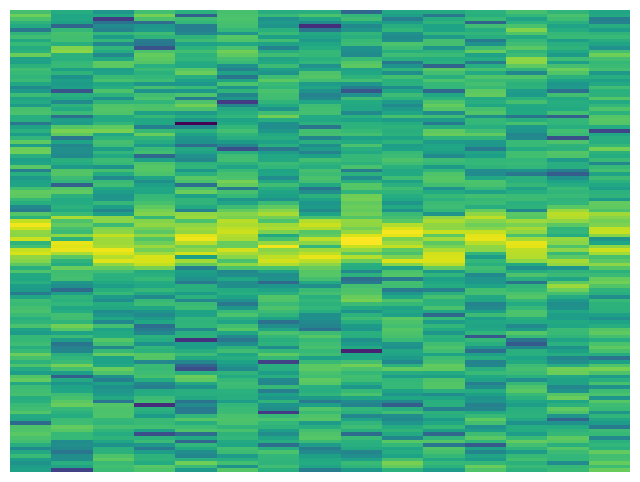

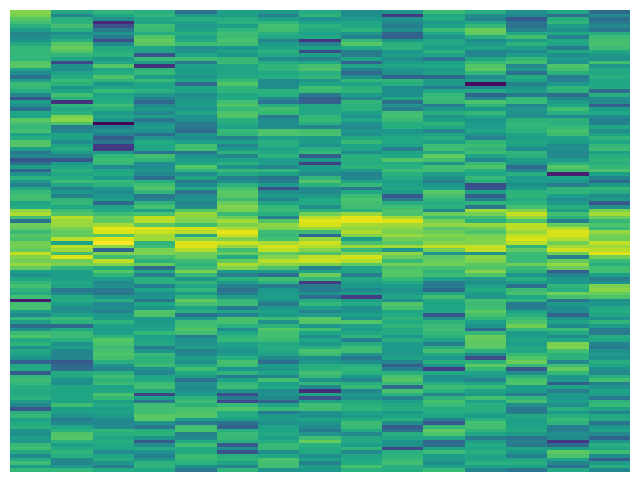

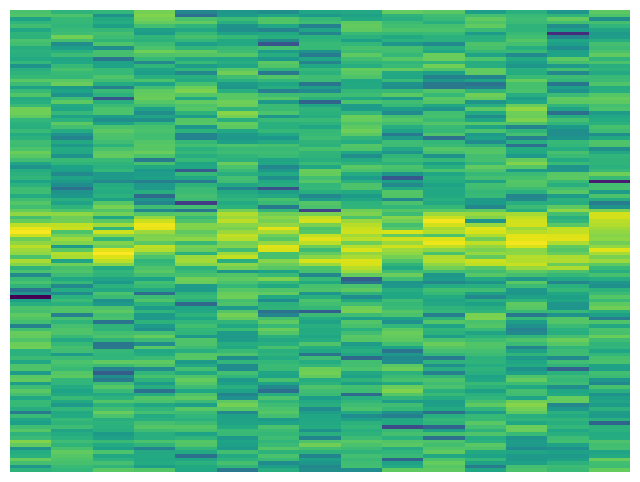

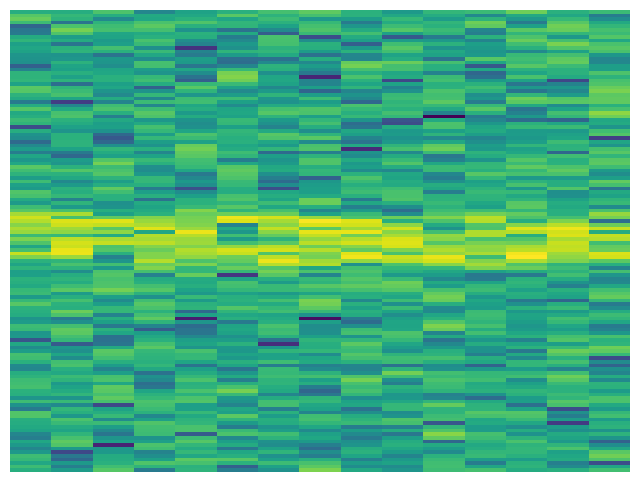

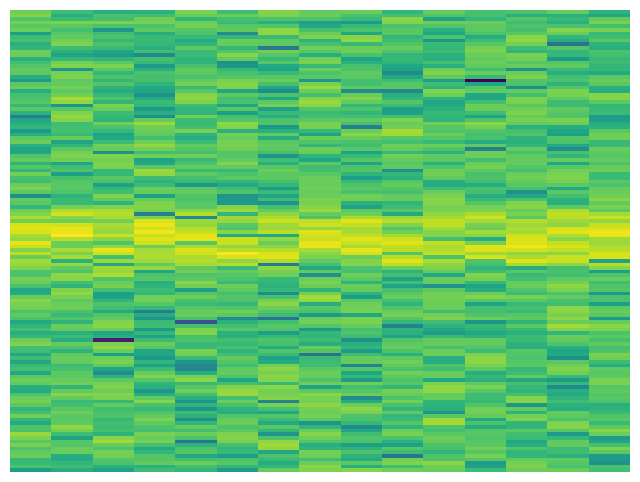

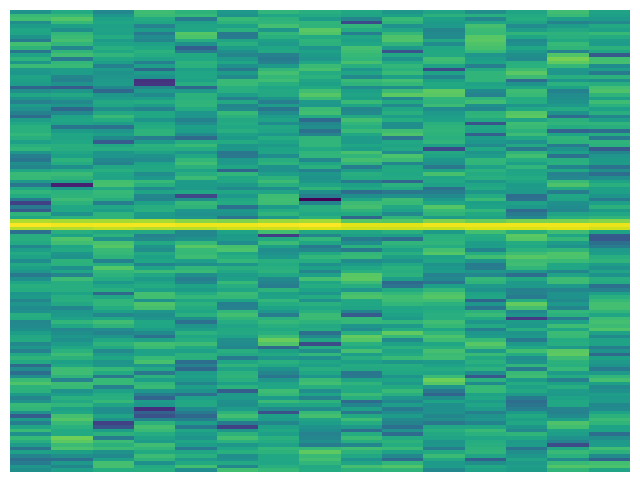

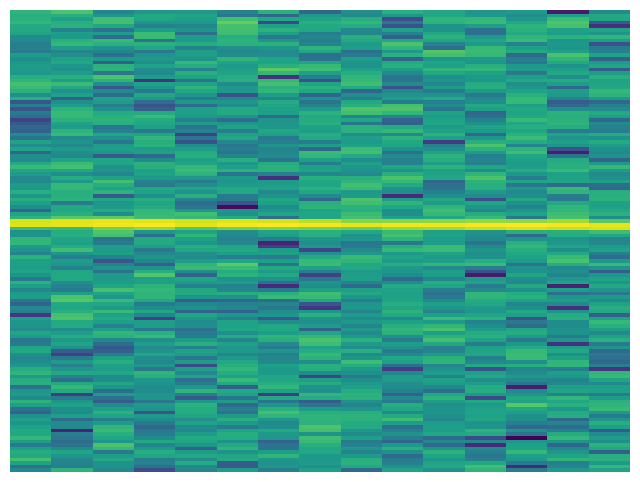

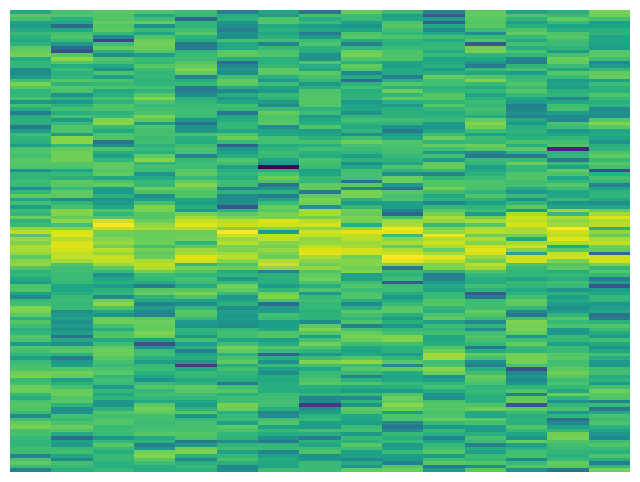

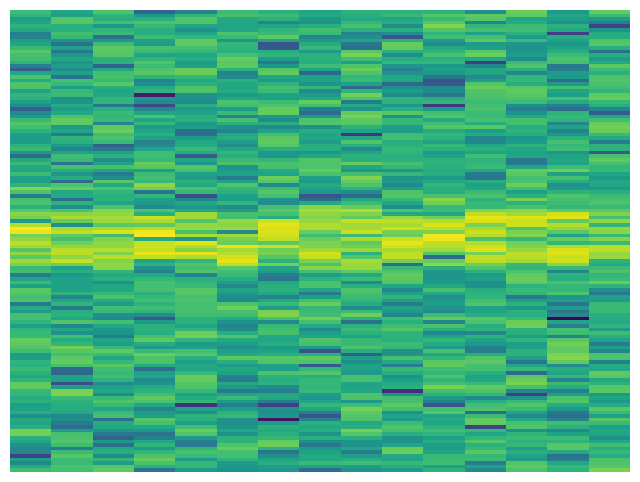

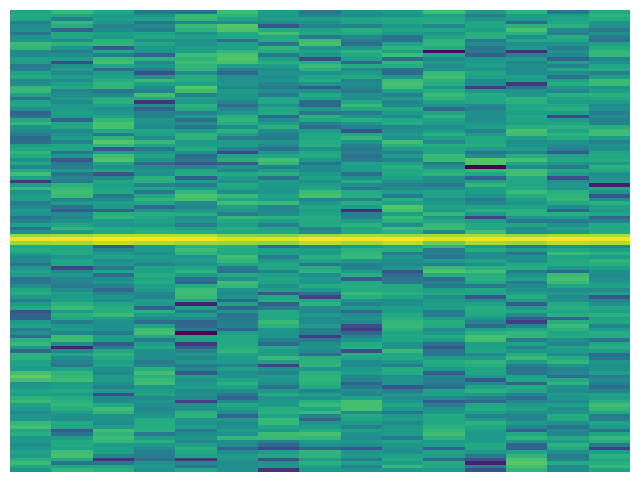

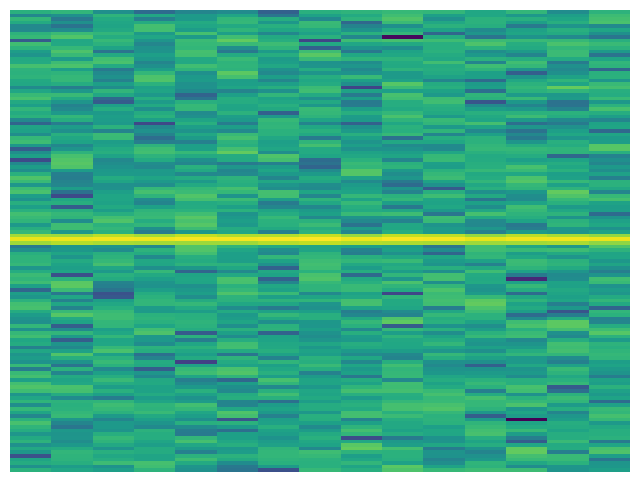

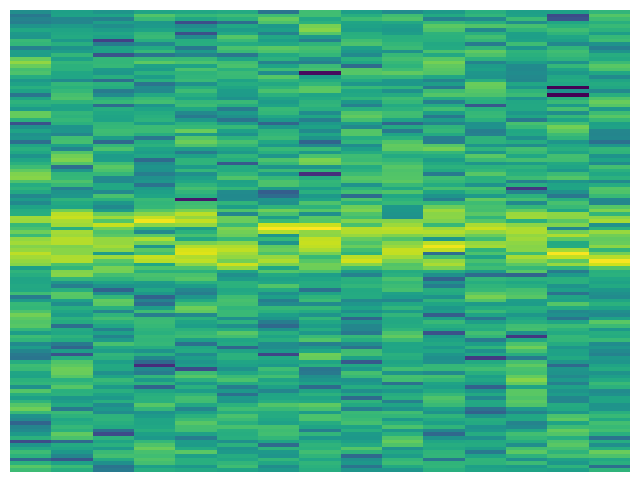

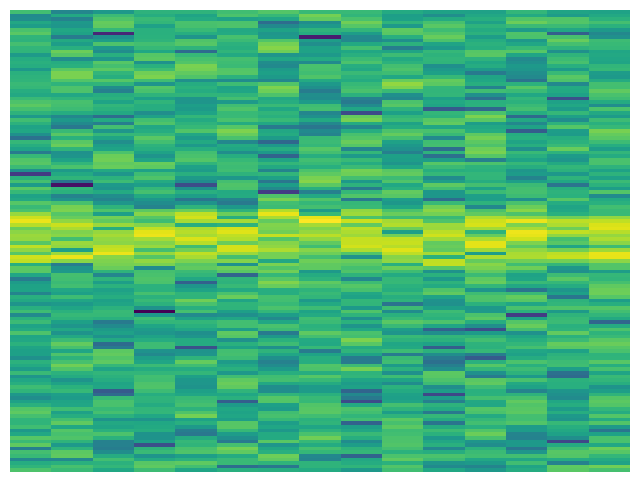

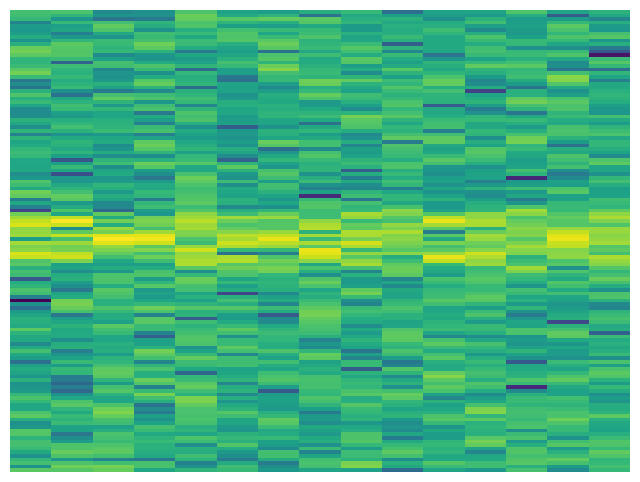

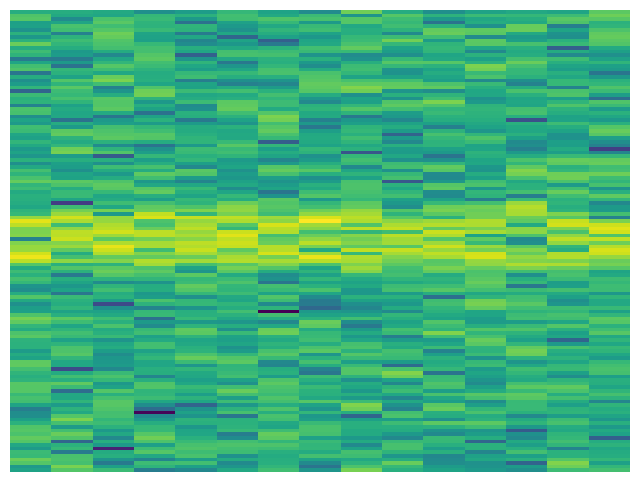

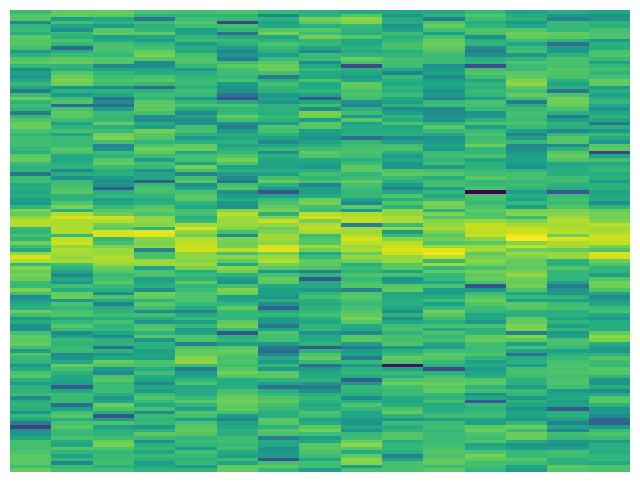

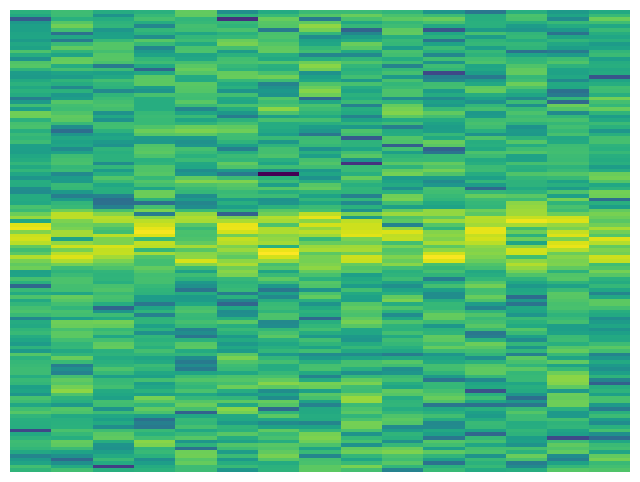

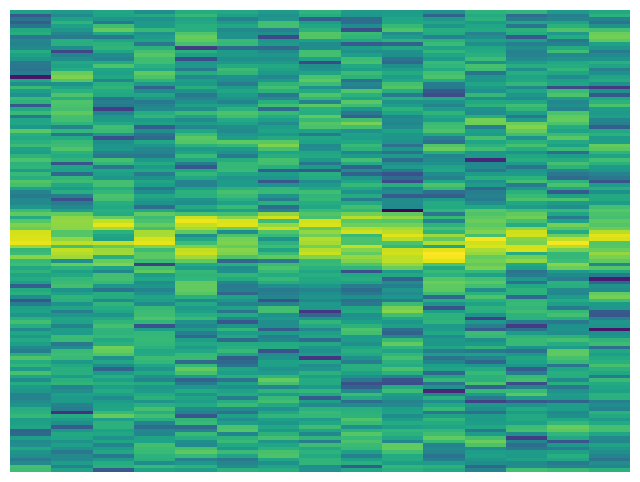

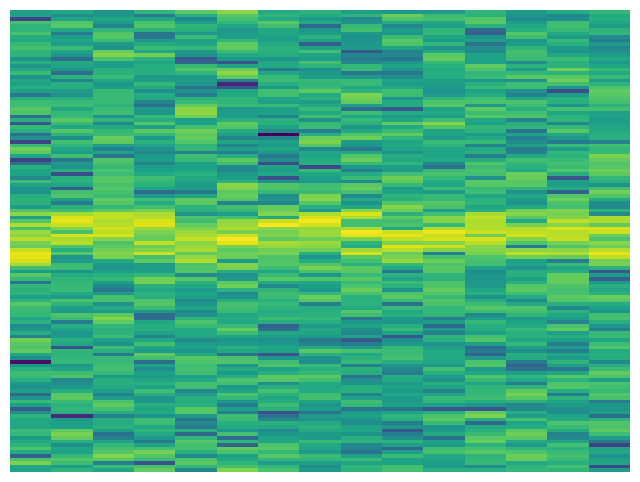

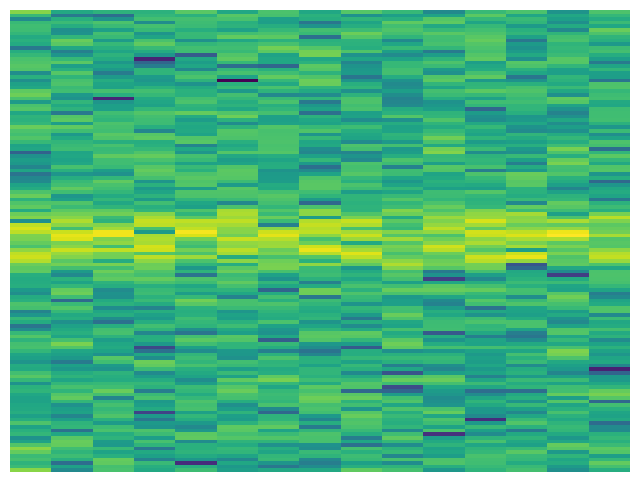

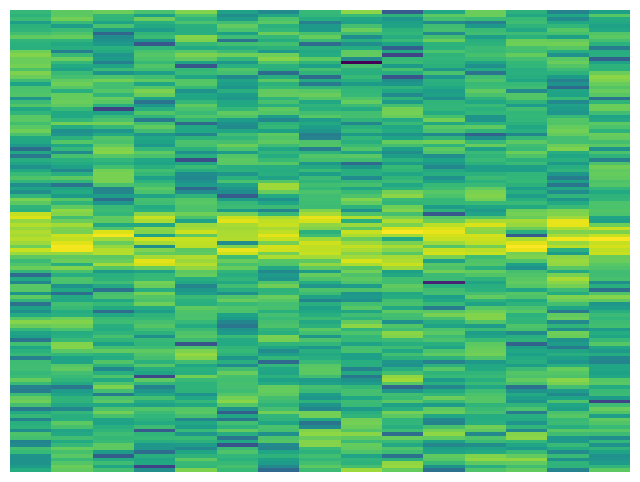

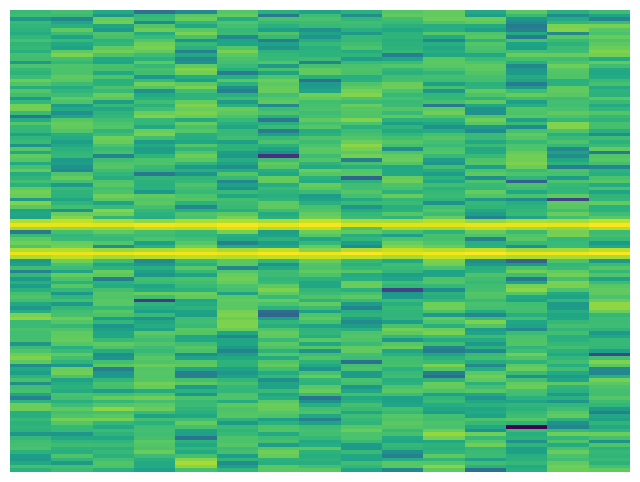

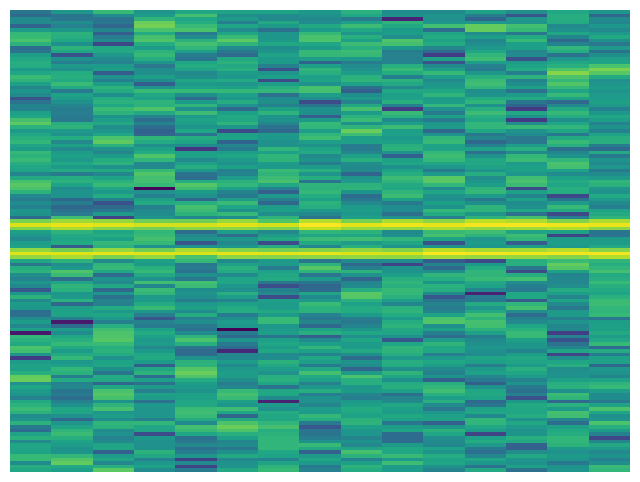

In [11]:
# Limit to 3 classes for demonstration, as in the original cell
# If you want to process all classes, you can remove or adjust this line.
# sample_names_subset = sample_names[:3]
# If you want to use all classes from cell 1, uncomment the line below and comment out the one above
# sample_names_subset = sample_names

# Iterate through each class and its sample file paths
for i, class_sample_paths in enumerate(sample_names): # sample_names is already subsetted in the original code
    class_name = class_names[i] # Get the class name
    for j, file_path in enumerate(class_sample_paths):
        # Load and convert the signal
        signal_data = load_npy_file(file_path)
        complex_signal = convert_signal_to_complex(signal_data)

        # Create a new figure for each spectrogram
        plt.figure(figsize=(8, 6)) # Adjust figsize as needed

        # Generate the spectrogram
        # NFFT=128, noverlap=64 as in the original cell.
        plt.specgram(x=complex_signal, NFFT=128, noverlap=64)

        # Set the title to the class name
        # plt.title(f"Class: {class_name} - Sample {j+1}")
        
        # Turn off the axes (labels, ticks) for a pure image representation if desired
        plt.axis('off') # Uncomment this line if you want to hide axes

        # Show the plot
        plt.show()


In [ ]:
import pickle

with open('/mnt/d/Rowan/discrete-llm-amc/data/RadioML/train_data.pkl', 'rb') as f:
    train_data = pickle.load(f)

print(f"Loaded data type: {type(train_data)}")
if isinstance(train_data, dict):
    print(f"Number of items: {len(train_data)}")
    # Optionally, print keys or a sample of the data to understand its structure
    # print(f"Keys: {list(train_data.keys())[:5]}")
elif isinstance(train_data, list):
    print(f"Number of items: {len(train_data)}")
    # Optionally, print the first few items
    # print(f"First few items: {train_data[:5]}")

Loaded data type: <class 'dict'>
Number of items: 17


In [3]:
train_data.keys()

dict_keys(['signal_paths', 'signals', 'stats', 'discret_stats', 'labels', 'snrs', 'prompts', 'discret_prompts', 'old_prompts', 'old_discret_prompts', 'feature_names', 'scaler', 'discretizers', 'num_samples', 'num_features', '#classes', '#snr'])

In [5]:
print(train_data['discret_prompts'][0])

There are 5 families of Wireless modulation schemes: {Amplitude-Based: {ASK: [4ASK, 8ASK, OOK], APSK: [16APSK, 32APSK, 64APSK, 128APSK]}, Analog: {AM: [AM-DSB-SC, AM-DSB-WC, AM-SSB-SC, AM-SSB-WC], FM: [FM]}, Phase-Based: {PSK: [BPSK, QPSK, 8PSK, 16PSK, 32PSK], Offset PSK: [OQPSK]}, Frequency-Based: {CPM: [GMSK]}, QAM-Based: {QAM: [16QAM, 32QAM, 64QAM, 128QAM, 256QAM]}}, we have quantitative features of a signal, and we need to classify the families of the modulation scheme based on these features. Based on the example below, please classify [A: Amplitude-Based, B: Analog, C: Phase-Based, D: Frequency-Based, E: QAM-Based] the modulation scheme of the signal based on the features provided.
### Question: moment_0: (A, A), moment_1: (A, A), moment_2: (E, A), moment_3: (H, F), moment_4: (A, A), moment_5: (G, D), moment_6: (A, A), moment_7: (G, C), moment_8: (A, A), moment_9: (G, C), kstat_1: F, kstat_2: A, kstat_3: I, kstat_4: A, kstatvar_1: A, kstatvar_2: A, 
### Answer: A
### Question: mo